In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import Functional_Fusion.dataset as fdata
import glob
import matplotlib.pyplot as plt
from cortico_cereb_connectivity.scripts.script_train_eval_models import *

##  Group vs. individual models
This checks the individual specificity of connectivity models. 

We use Task set A (S1) from MDTB to train models, and evaluate on task set B (S2). 

Compare the model trained on the same subject, different subject, group, and group with leave-one-subject out. 

In [ ]:
# All individual models
D = fdata.get_dataset_class(gl.base_dir,'MDTB')
# Get participants info
T = D.get_participants()
subj_name = list(T['participant_id'])
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset = ['MDTB'], eval_ses="ses-s2",
            eval_id = 'MDs1-ind-scale',model=subj_name,ext_list=[8])

In [ ]:
# Average model
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset = ['MDTB'], eval_ses="ses-s2",
            eval_id = 'MDs1-avg-scale', model='avg', ext_list=[8])

In [ ]:
# Leave one out model
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset = ['MDTB'], eval_ses="ses-s2",
            eval_id = 'MDs1-loo-scale', model='loo', ext_list=[8])

### Evaluation of S1 model on S2

In [8]:
df2=rm.comb_eval(models=['MDs1-ind-scale','MDs1-avg-scale','MDs1-loo-scale'],eval_data=['MDTBs2'])
df2['model_type'] = df2['model']
df2.loc[df2['model'].isna() & (df2.subj_id != df2.eval_subj),'model_type']='diff'
df2.loc[df2['model'].isna() & (df2.subj_id == df2.eval_subj),'model_type']='same'

<Axes: xlabel='model_type', ylabel='R_eval'>

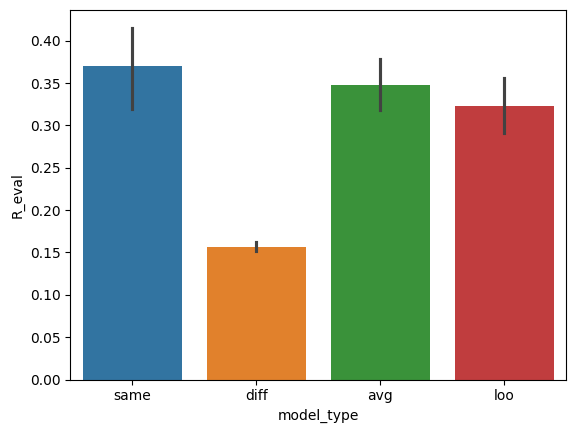

In [9]:
sns.barplot(data=df2,x='model_type',y='R_eval',hue='model_type')

### 

### Evaluation of S1 on S1

In [ ]:
df1=rm.comb_eval(models=['Mds1-ind','MDs1-avg','MDs1-loo'],eval_data=['MDTBs1'])
df1['model_type'] = df1['model']
df1.loc[df1['model'].isna() & (df1.subj_id != df1.eval_subj),'model_type']='diff'
df1.loc[df1['model'].isna() & (df1.subj_id == df1.eval_subj),'model_type']='same'


<AxesSubplot:xlabel='model_type', ylabel='R_eval'>

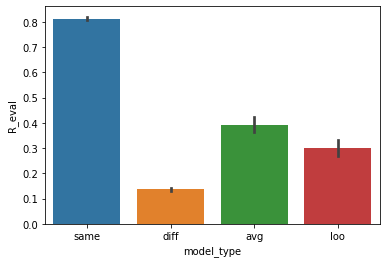

In [22]:
sns.barplot(data=df1,x='model_type',y='R_eval')

### Evaluate average model on S2 only 


In [25]:
df2a=rm.comb_eval(models=['Md-ind','MD-avg','MD-loo'],eval_data=['MDTBs2'])
df2a['model_type'] = df2a['model']
df2a.loc[df2a['model'].isna() & (df2a.subj_id != df2a.eval_subj),'model_type']='diff'
df2a.loc[df2a['model'].isna() & (df2a.subj_id == df2a.eval_subj),'model_type']='same'


<AxesSubplot:xlabel='model_type', ylabel='R_eval'>

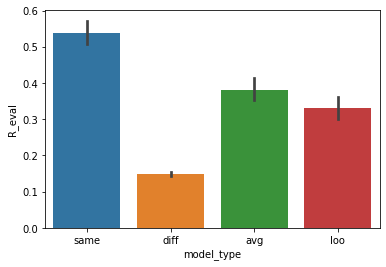

In [26]:
sns.barplot(data=df2a,x='model_type',y='R_eval')

### Evaluate average model on S1 only 

In [35]:
df1a=rm.comb_eval(models=['Md-ind','MD-avg','MD-loo'],eval_data=['MDTBs1'])
df1a['model_type'] = df1a['model']


<AxesSubplot:xlabel='model_type', ylabel='R_eval'>

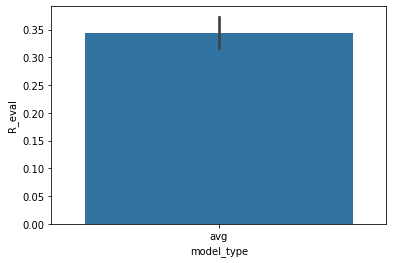

In [36]:
sns.barplot(data=df1a,x='model_type',y='R_eval')

### Evaluation of Average model on both sessions

In [31]:
dfa=rm.comb_eval(models=['Md-ind','Md','Md-loo'],eval_data=['MDTB'])
dfa = dfa[dfa.logalpha==8]
dfa['model_type'] = dfa['model']
# dfa.loc[dfa['model'].isna() & (dfa.subj_id != dfa.eval_subj),'model_type']='diff'
# dfa.loc[dfa['model'].isna() & (dfa.subj_id == dfa.eval_subj),'model_type']='same'


<AxesSubplot:xlabel='model_type', ylabel='R_eval'>

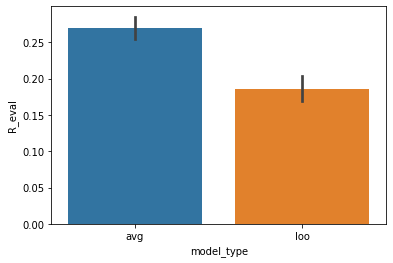

In [34]:
sns.barplot(data=dfa,x='model_type',y='R_eval')